# Feature selection: PCA

In the final phase of the study, the goal was not only to create a time series plot representing the overall crime rates in the 12 districts of Berlin over the past decade, but also to demonstrate the trend for various types of crimes to identify noteworthy differences. However, creating and comparing 20 individual plots would have been quite a complex task.

To address this, the mean value of each crime feature for each district over the last 10 years was computed. Subsequently, a Principal Component Analysis (PCA) was conducted with these mean values, leading to the creation of a biplot. The biplot revealed that most crime features showed similarities, while car theft, fire crimes and burglary appeared to be distinct from the others, making them especially interesting for further investigation.

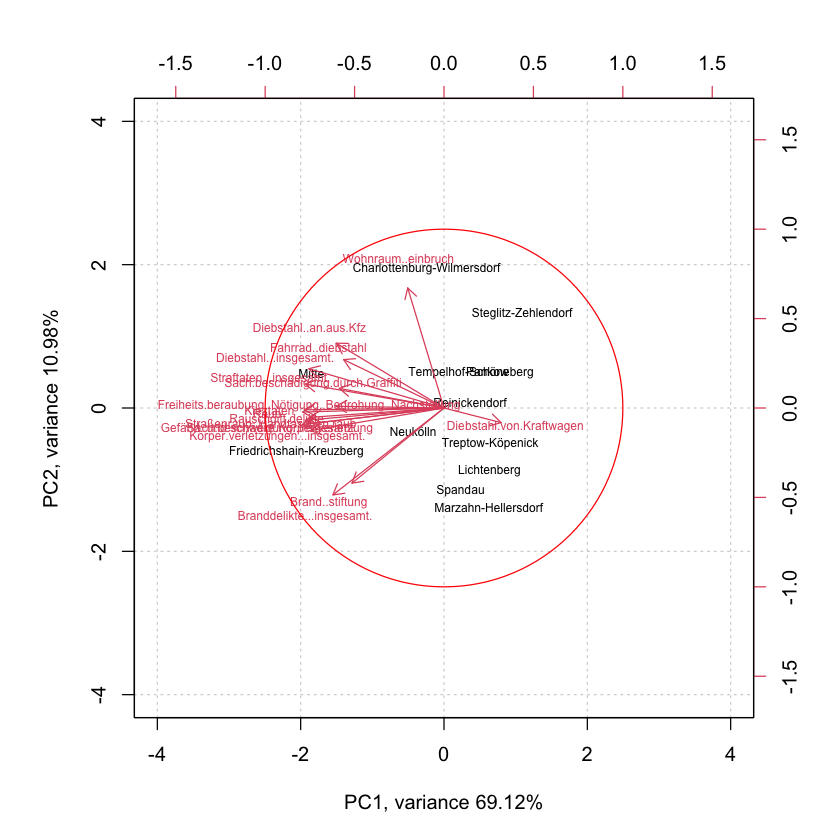

In [1]:
# Change the directory to where the data is stored
setwd("/Users/robert/Documents/Master Data Science/2. Semester/Data Visualization/PROJECT/VisuProj23")
df <- read.csv("data/bezirkskriminalitaet_average.csv")
row.names(df) <- df$Bezirk
df <- df[,-c(1,19)]

# Perform PCA
one_prcomp <- prcomp(df, scale. = TRUE)
PCs_prcomp <- one_prcomp$x
PCvariances <- one_prcomp$sdev^2

# Create a biplot
biplot(one_prcomp, pc.biplot = TRUE,
       xlab = paste0("PC1, variance ", round(PCvariances[1] / sum(PCvariances) * 100, 2), "%"),
       ylab = paste0("PC2, variance ", round(PCvariances[2] / sum(PCvariances) * 100, 2), "%"),
       xlim = c(-4, 4), ylim = c(-4, 4), cex = 0.6,
       expand = 1.2, asp = 1, bg = "lightgray", panel.first = grid())
symbols(0, 0, circles = 1, inches = FALSE, add = TRUE, fg = "red")

```{figure} figures/biplot_crimes.svg
---
height: 500px
name: fig:crime-biplot
---
Biplot of first two principal components for crime features by district (average yearly numbers per 100,000 for 2013-2022)
```